In [2]:
from strat_a.data_loader import DataLoader
from utilities.synth_futures.synthetic_futures_backtest import run_synthetic_futures, SyntheticConfig, parameter_sensitivity

In [3]:

dl = DataLoader("./data_collect/data/raw")


DataLoader: data_collect\data\raw
  Found:   binance_spot, binance_perp, binance_funding, binance_quarterly, binance_contracts, deribit_perp, deribit_funding, deribit_quarterly, hyperliquid_funding, hyperliquid_perp, dydx_funding, dydx_perp
  Missing: deribit_contracts



══════════════════════════════════════════════════════════════
  STRATEGY C: Synthetic Futures from Perp Funding
══════════════════════════════════════════════════════════════
  Venue pairs: ['binance-dydx', 'deribit-dydx', 'deribit-binance']
  Entry: |ann spread| > 8.0%
  Exit:  |ann spread| < 1.0%, flip exit
  Z-score: lookback=60, entry_boost=0.0, z_stop=-2.5
  Position: 50% base × regime × z_scalar, max 2
  Costs (binance-dydx): 0.2400% RT, gas=$0.20
  Costs (deribit-dydx): 0.2800% RT, gas=$0.20
  Costs (deribit-binance): 0.2200% RT
  Loaded binance funding: 4,383 rows
  Loaded deribit funding: 35,063 rows
  Loaded hyperliquid funding: 22,590 rows
  Loaded dydx funding: 19,134 rows
  ⚠ Repaired 8760 rows with μs timestamps → ms
  Binance perp prices: 35,065 rows (2022-01-01 → 2025-12-31)
  Deribit perp prices: 5,001 rows (2025-06-06 → 2025-12-31)
  Dydx perp prices: 18,693 rows (2023-11-13 → 2025-12-31)
  Hyperliquid perp prices: 3,756 rows (2025-07-28 → 2025-12-31)
  binance dail

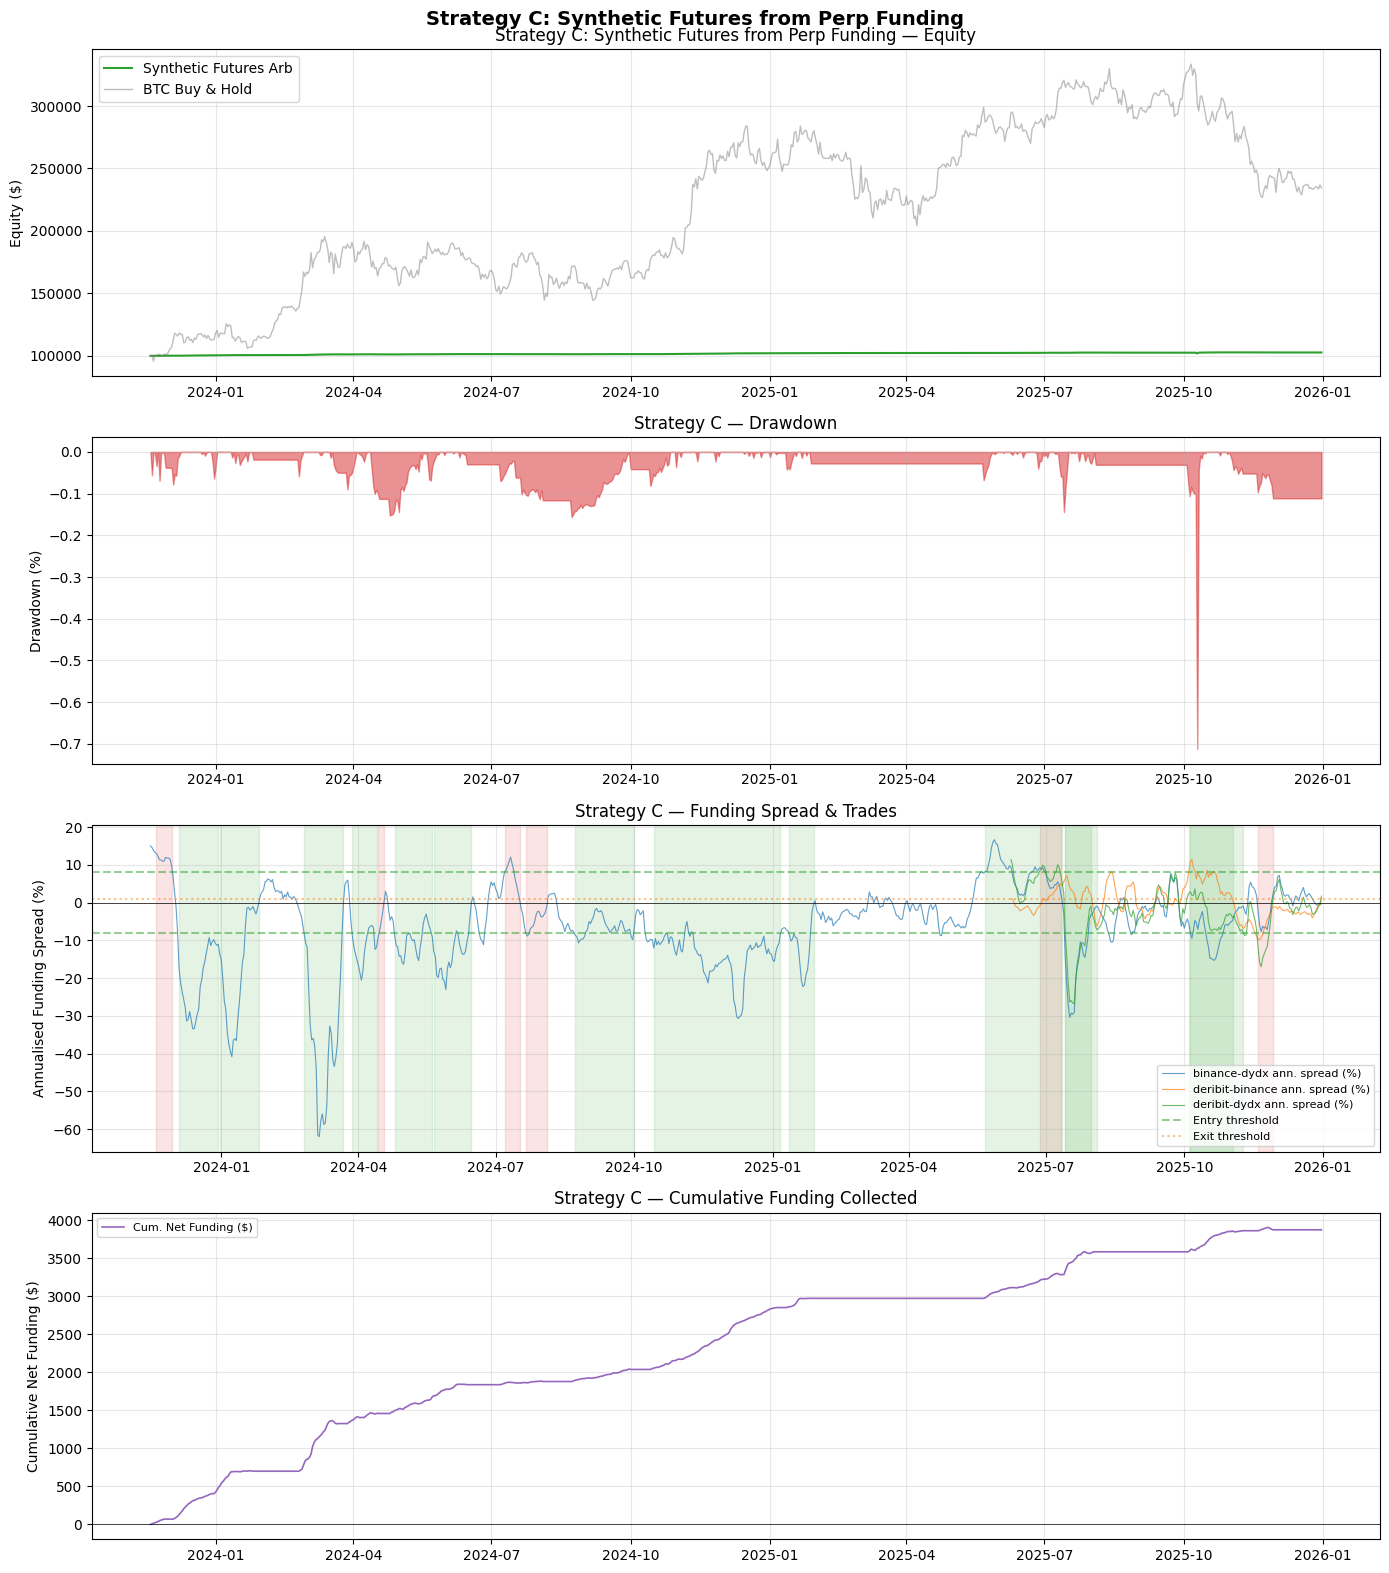


══════════════════════════════════════════════════════════════
  C: Synthetic Futures from Perp Funding
══════════════════════════════════════════════════════════════
  Total Return Pct                        2.64%
  Annualized Return Pct                   1.24%
  Sharpe Ratio                            -3.95
  Sharpe Se                                0.11
  Sortino Ratio                           -5.33
  Max Drawdown Pct                       -0.71%
  Calmar Ratio                             1.74
  Capital Utilisation Pct                16.50%
  Return On Deployed Ann Pct              7.43%
  Btc Correlation                          0.08
  N Trades                                   20
  Win Rate                                70.0%
  Avg Win                                204.22
  Avg Loss                               -42.91
  Profit Factor                           11.10
  Total Pnl                             2601.64
  Total Cost                            1258.17
  Cost Drag Pct 

In [4]:
result = run_synthetic_futures(dl, test_only=False)
result.summary()

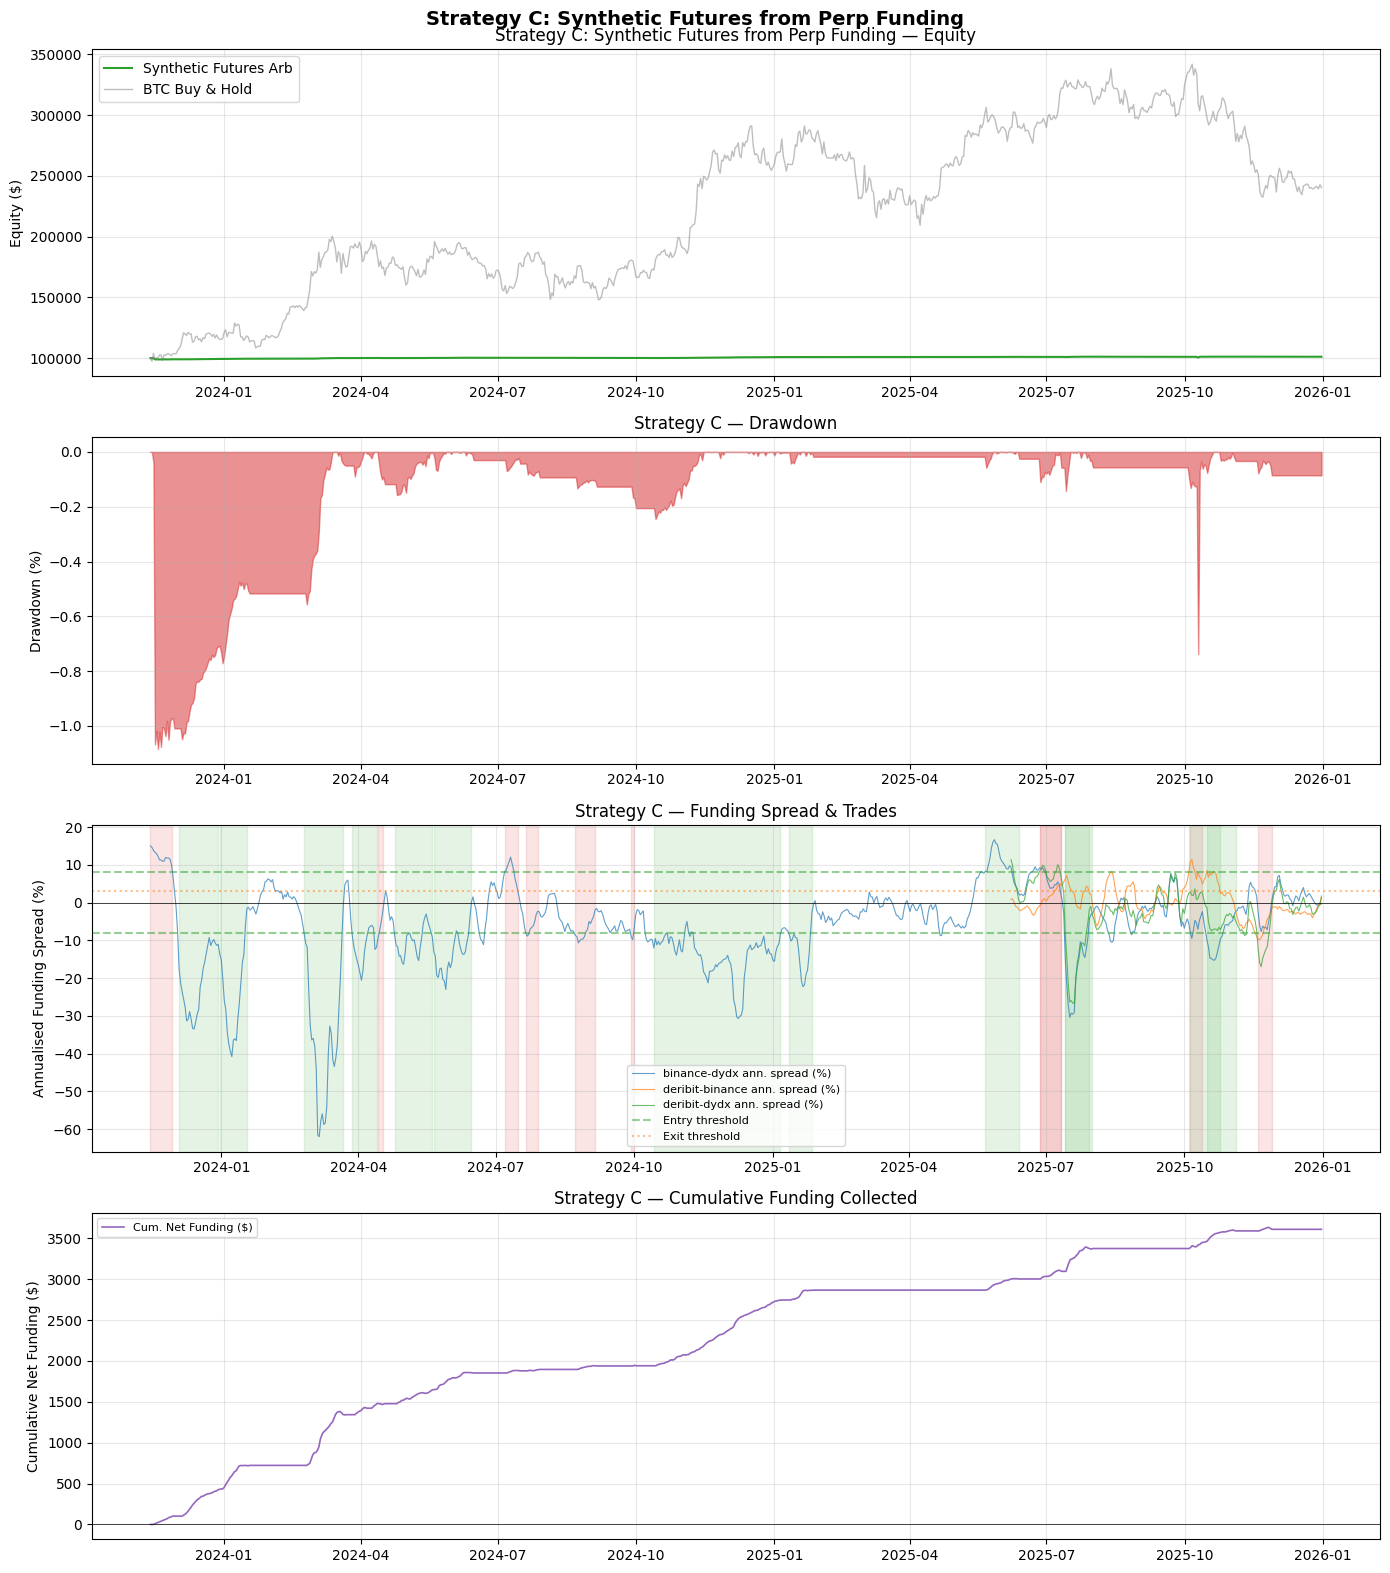

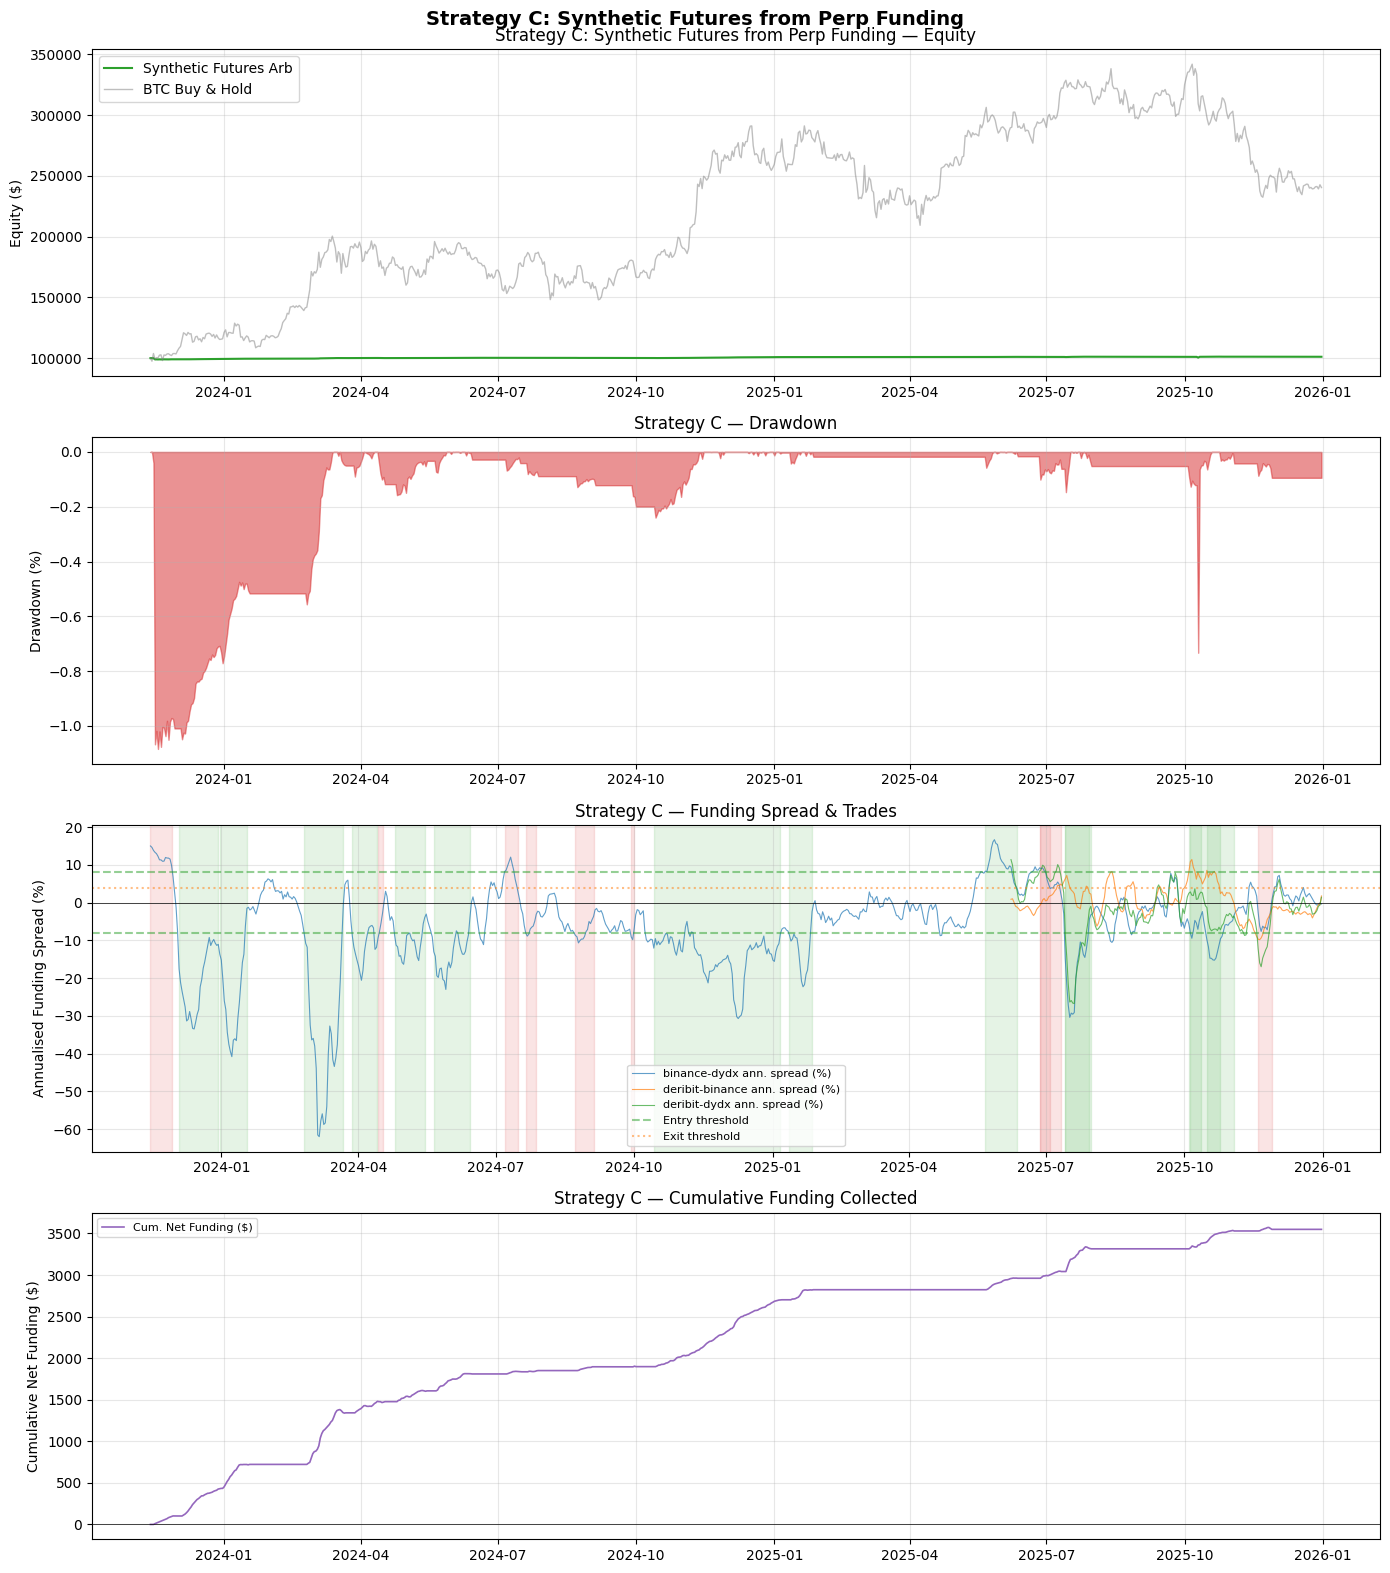

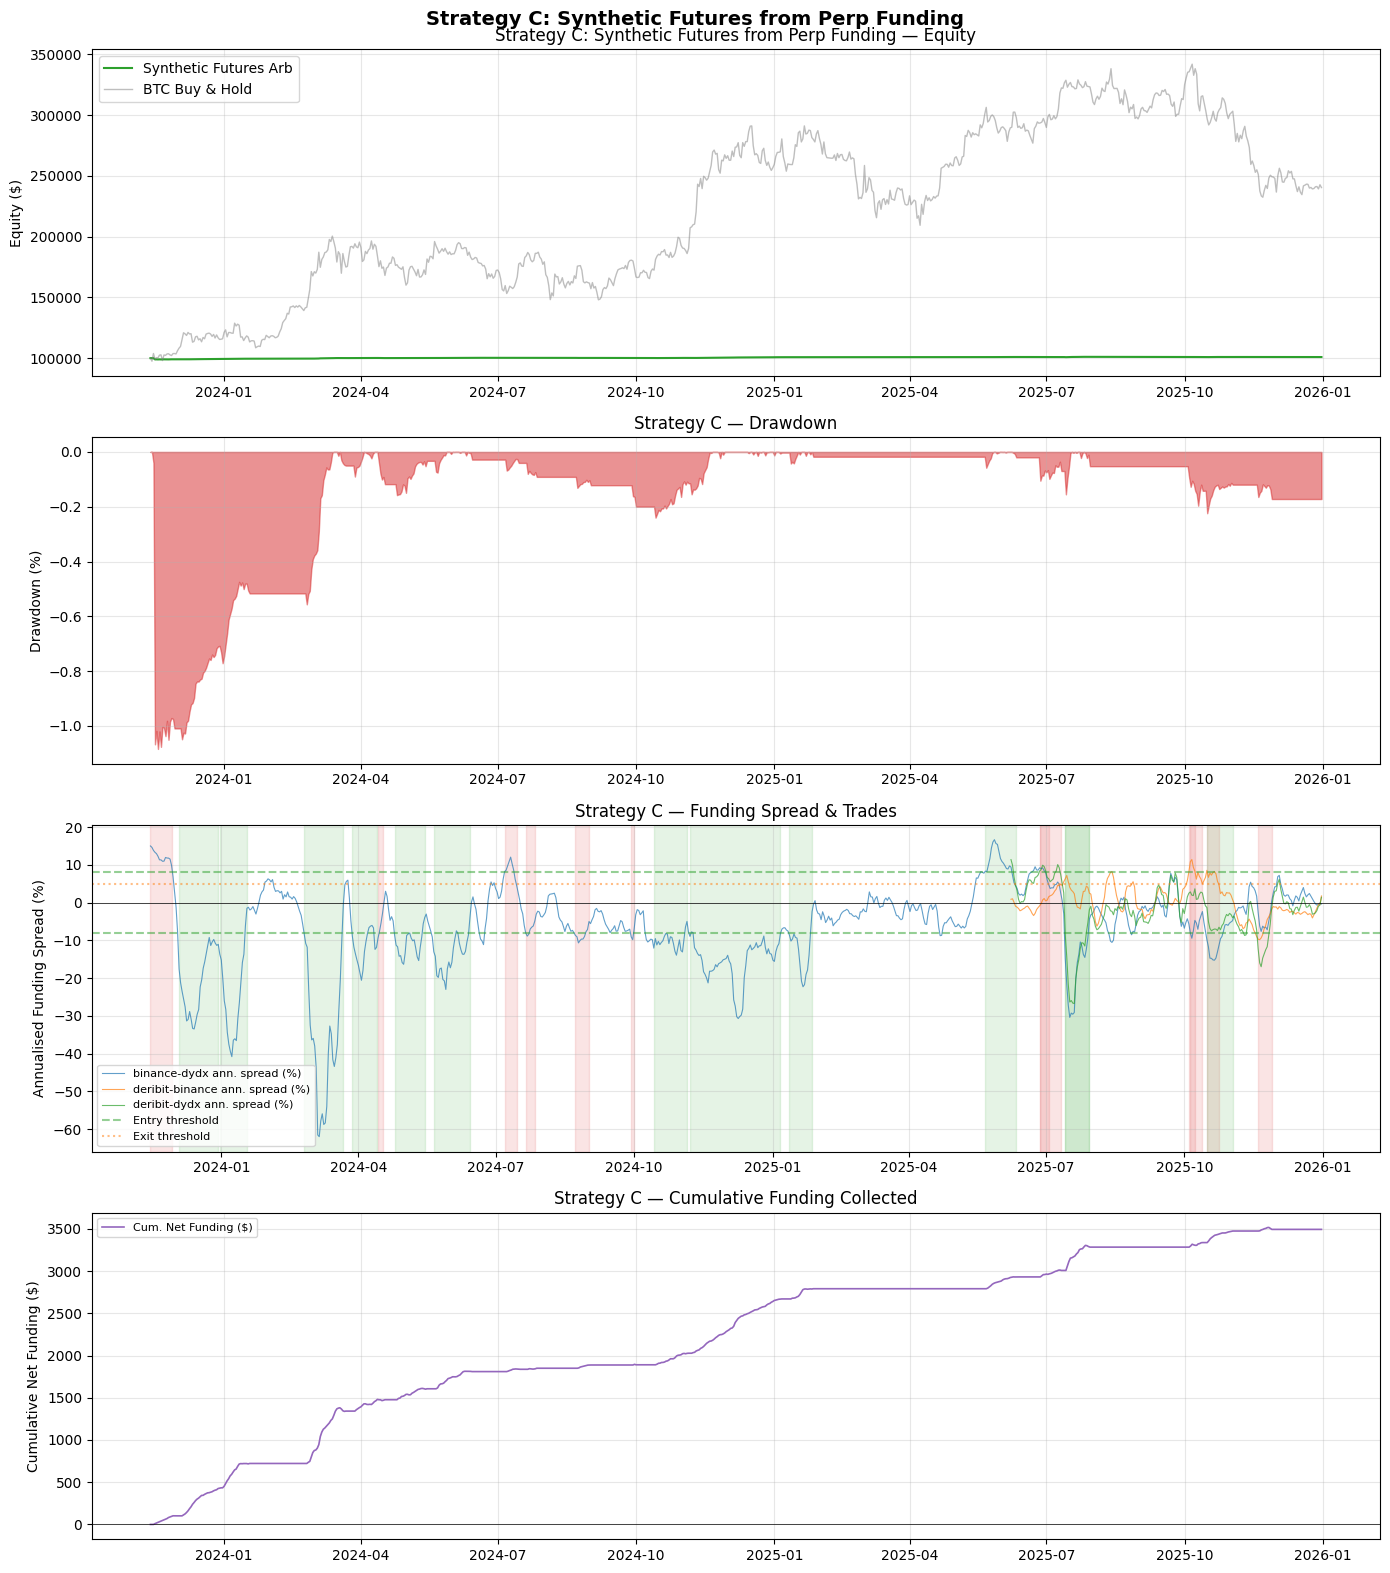

   spread_exit_ann_pct  sharpe  return_pct  max_dd_pct  n_trades  win_rate      pnl  avg_net_funding_ann
0                    3  -3.468        1.15       -1.08        23     0.565  1153.37                 9.75
1                    4  -3.484        1.13       -1.08        23     0.609  1131.33                 9.84
2                    5  -4.592        0.90       -1.08        25     0.520   903.46                 9.78


In [5]:
sens = parameter_sensitivity(dl, "spread_exit_ann_pct", [3, 4, 5])
print(sens.to_string())

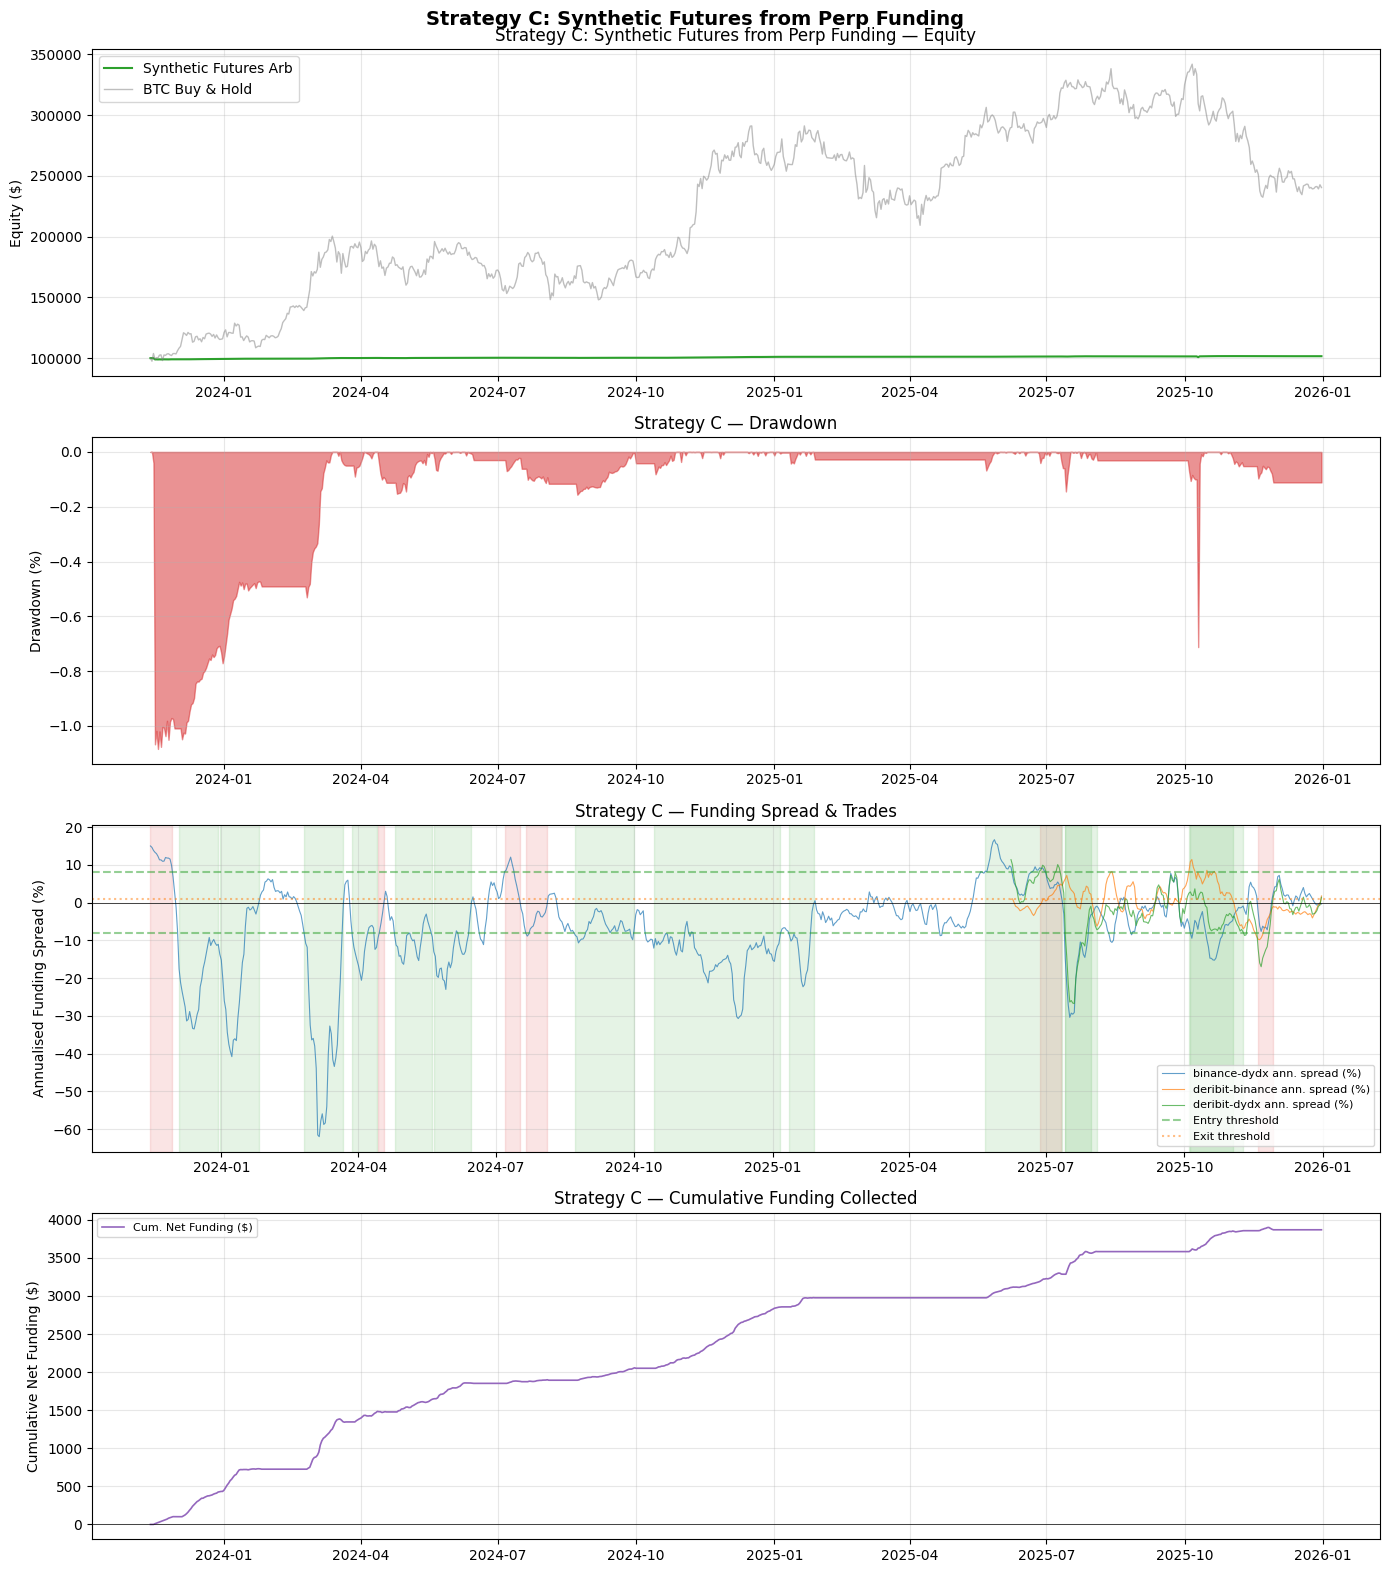

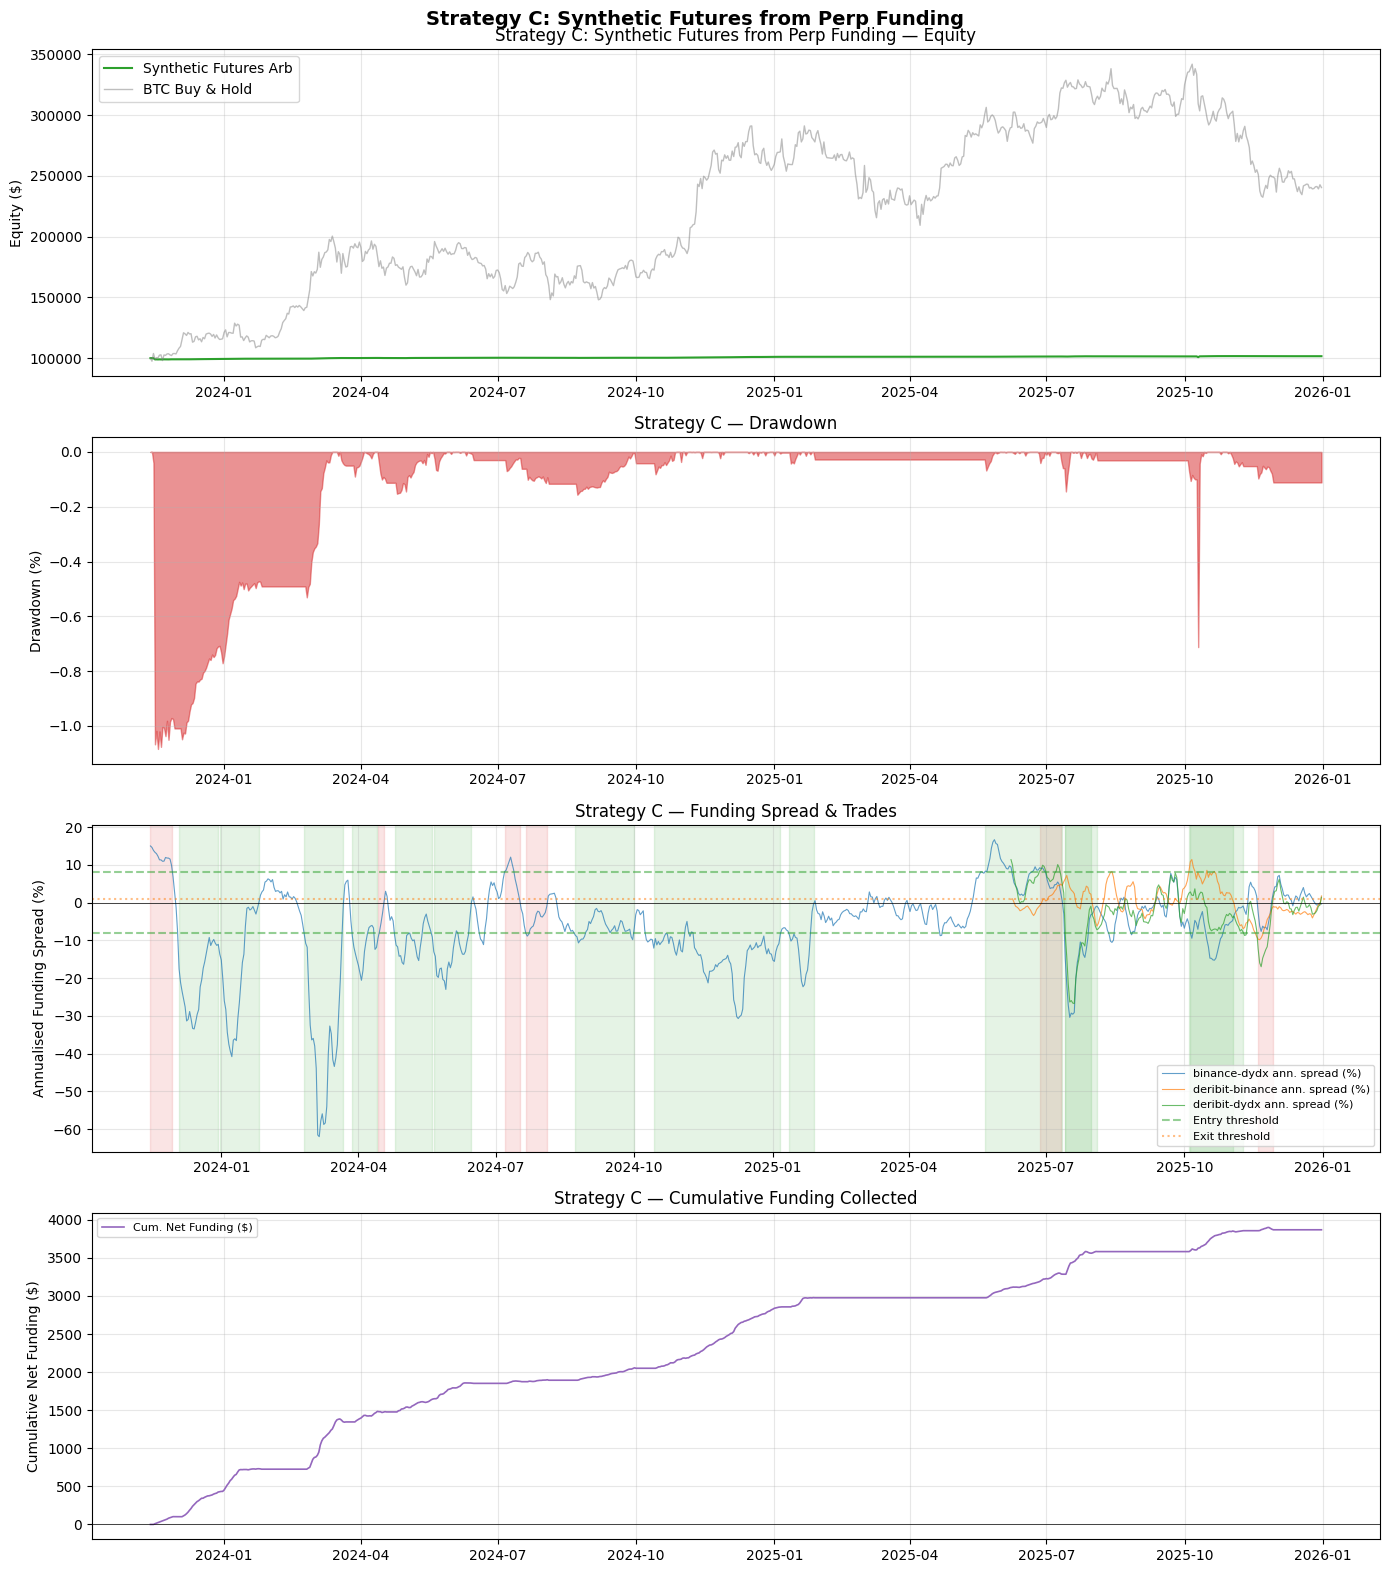

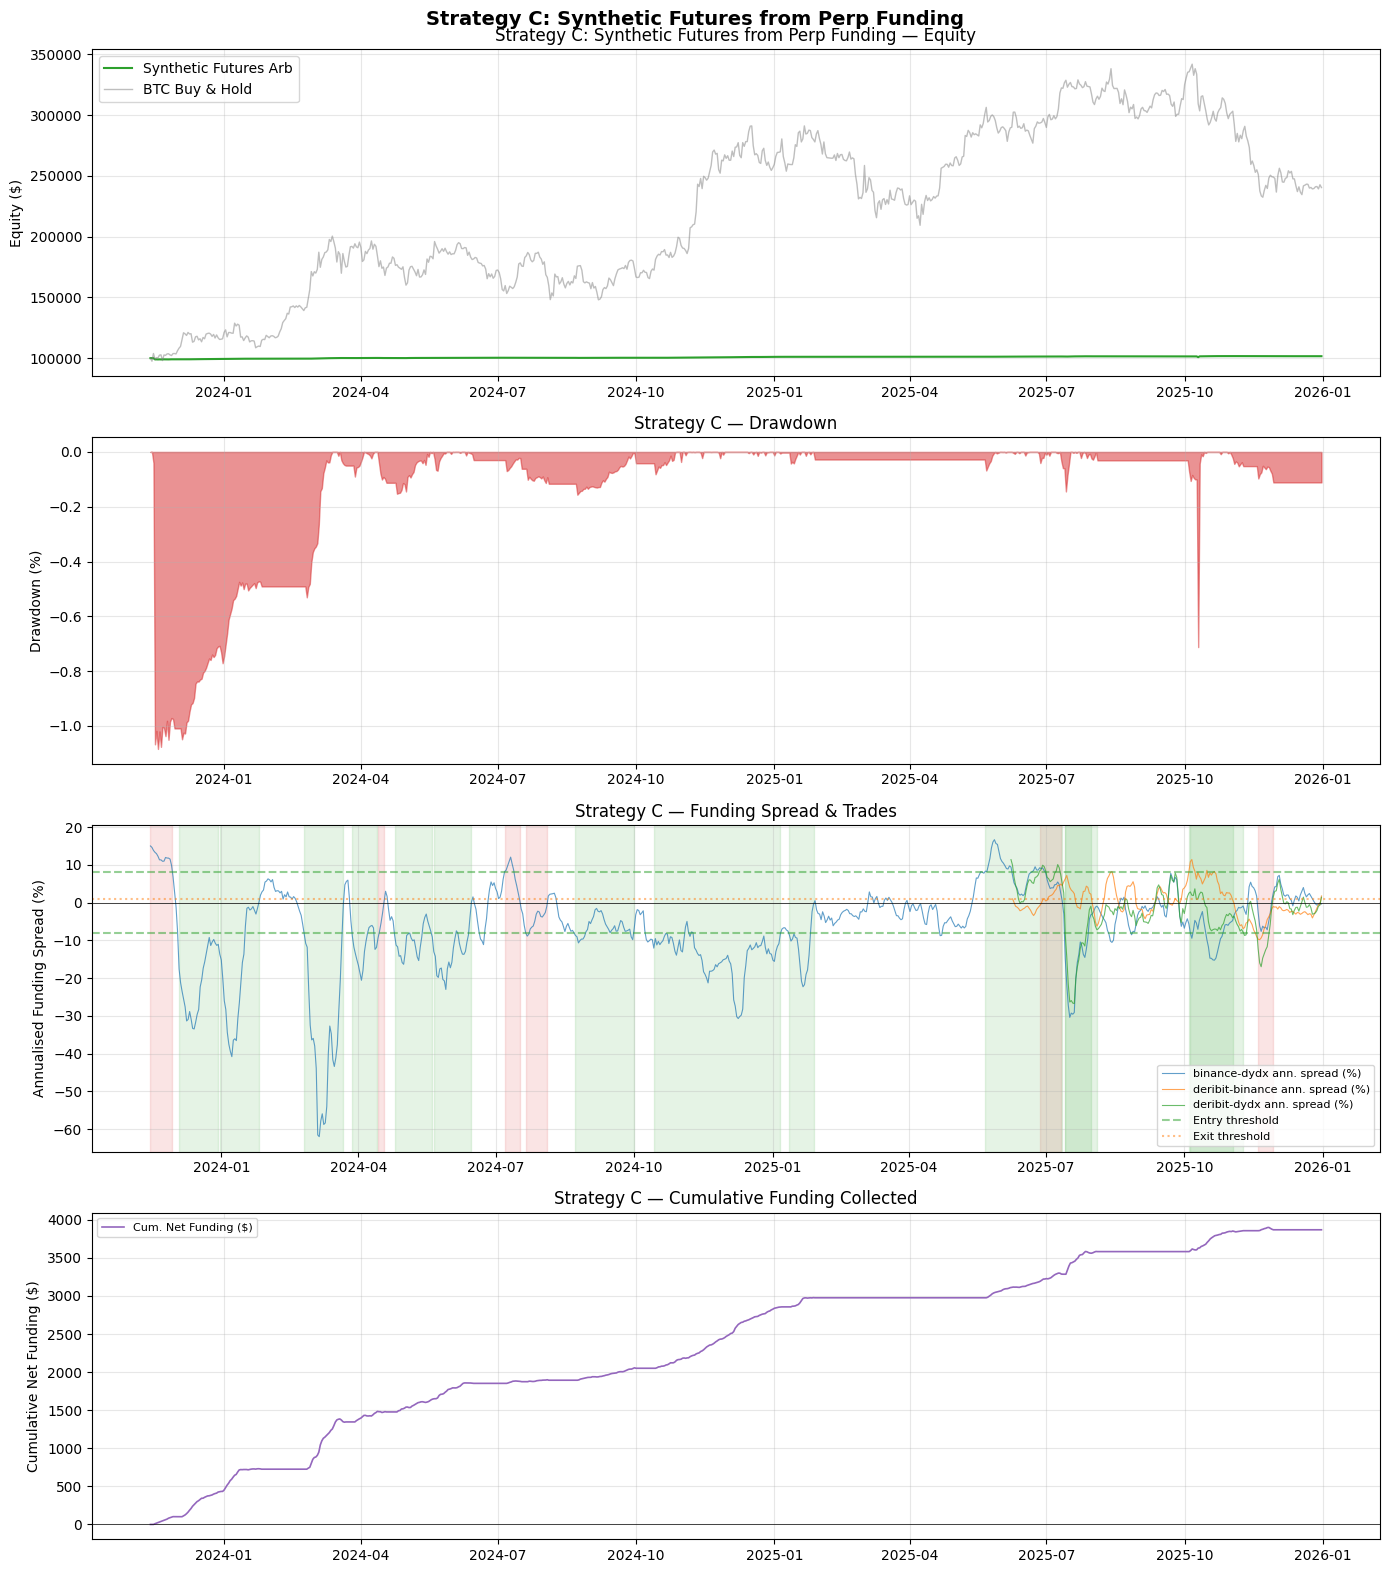

   max_positions  sharpe  return_pct  max_dd_pct  n_trades  win_rate      pnl  avg_net_funding_ann
0              3  -3.267         1.6       -1.08        20       0.7  1595.69                 9.95
1              4  -3.267         1.6       -1.08        20       0.7  1595.69                 9.95
2              5  -3.267         1.6       -1.08        20       0.7  1595.69                 9.95


In [6]:
sens = parameter_sensitivity(dl, "max_positions", [3, 4, 5])
print(sens.to_string())